# NDVI


In [ ]:
from google.colab import drive
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import SVR

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/DATAFRAME_NDVIEVI_-_DATAFRAME_NDVIEVI.csv')

In [ ]:
df=df.set_index('year')

In [ ]:
dfndvi=df.copy()

In [ ]:
dfndvi.drop(['Unnamed: 0','eOct','eNov','eDec','eJan','eFeb','eMar','eApr','eMay','LAI','eMean','nOct','nApr','nMay','nMean','Rainfall','Production'], axis=1, inplace=True)

In [ ]:
dfndvi.head()

,nNov,nDec,nJan,nFeb,nMar,Area,Yield
year,,,,,,,
2000,0.205477,0.214600,0.231618,0.225767,0.201072,27.49,2778.0
2001,0.220225,0.227810,0.250651,0.248579,0.230734,25.73,2708.0
2002,0.178285,0.187111,0.206101,0.207492,0.194706,26.34,2762.0
2003,0.242215,0.252126,0.266660,0.261027,0.227542,25.20,2610.0
2004,0.233797,0.252087,0.263573,0.252415,0.225391,26.59,2713.0


In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
y=dfndvi.pop('Yield')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfndvi, y, test_size=0.25, random_state=7)
print(X_train.shape)
print(X_test.shape)
y_test

(15, 6)
(5, 6)


year
2001    2708.0
2017    3200.0
2002    2762.0
2005    2602.0
2011    2988.0
Name: Yield, dtype: float64

In [ ]:
dtree = DecisionTreeRegressor(max_depth=6, random_state=5)
dtree.fit(X_train, y_train)
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

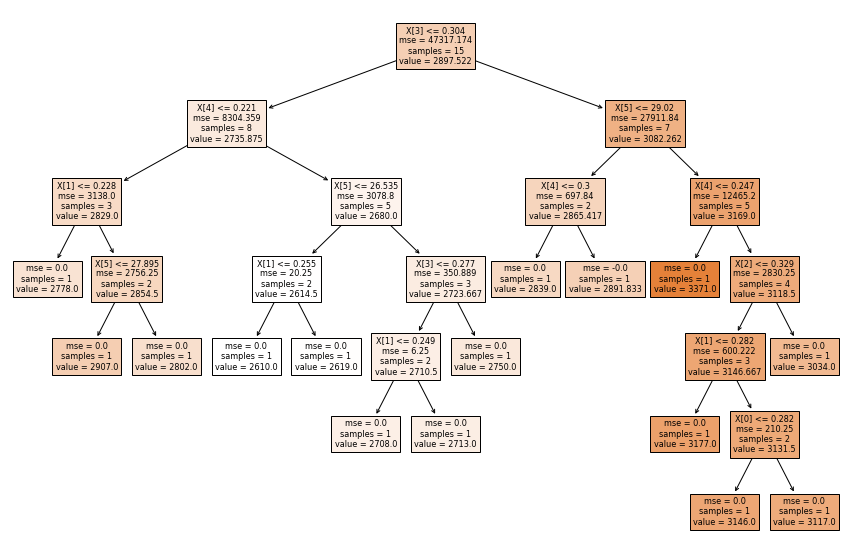

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dtree.fit(X_train, y_train), filled=True)
plt.show()

In [ ]:
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr1))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr1,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr1))

RMSE via prediction on training set:  0.0
Mean Absolute Error: [0.]
R squared via prediction on training set:  1.0


In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr1
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='Decision Tree NDVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y1,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y1))

RMSE via prediction on test set:  269.08325849075044
Mean Absolute Error: [221.4]
R squared via prediction on test set:  -0.5676594381127238


In [ ]:
temp_df = y_test.to_frame()
temp_df['Pred_Yield'] = y1
temp_df.sort_index(inplace=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## Random Forest

In [ ]:
model_rf = RandomForestRegressor(n_estimators=15, max_depth=5, random_state=2)
model_rf.fit(X_train, y_train)
tr2 = model_rf.predict(X_train)
y2 = model_rf.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr2))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr2,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr2))

RMSE via prediction on training set:  65.35166484890462
Mean Absolute Error: [45.84148148]
R squared via prediction on training set:  0.909740168836212


In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr2
temp_df.sort_index(inplace=True)


In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr2
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='RandomForest NDVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y2))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y2,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y2))

RMSE via prediction on test set:  150.5036758502743
Mean Absolute Error: [100.53333333]
R squared via prediction on test set:  0.509575024152916


In [ ]:
temp_df = y_test.to_frame()
temp_df['Pred_Yield'] = y2
temp_df.sort_index(inplace=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## Non-Linear Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [ ]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 4
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min, degree_max+1):
    print('For degree ', degree)
    model = make_pipeline(
      PolynomialFeatures(degree, interaction_only=False), 
      LassoCV(
        eps=lasso_eps,
        n_alphas=lasso_nalpha,
        max_iter=lasso_iter, 
        normalize=True,cv=5
      )
    )
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    train_pred=np.array(model.predict(X_train))
    d = {'Yield': y_test, 'Predict': test_pred}
    temp_df = pd.DataFrame(data = d)
    temp_df = temp_df.sort_values('Yield')
    temp_df = temp_df.reset_index()

    # Print Figure
   
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test, y_test)
    MAE=mean_absolute_error(y_test,test_pred)
    print('RMSE = ', RMSE)
    print('MAE ', MAE)
    print('test_score = ', test_score)
    RMSE1=np.sqrt(np.sum(np.square(train_pred-y_train)))
    test_score1 = model.score(X_train, y_train)
    MAE1=mean_absolute_error(y_train,train_pred)
    print('RMSE = ', RMSE1)
    print('MAE ', MAE1)
    print('Train = ', test_score1)

For degree  2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 50.54849287751131, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.73728303636017, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2602.1791288245295, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6794.4494145766, tolerance: 39.32420254

RMSE =  348.02168403139655
MAE  135.00310695886546
test_score =  0.47552961618782164
RMSE =  710.4471100072641
MAE  151.92265534552766
Train =  0.28886271386014795
For degree  3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 964.3579642923432, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2413.5901766585375, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4875.941078364005, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 10073.439192842454, tolerance: 39.324202

RMSE =  350.89502310943317
MAE  135.57228454794176
test_score =  0.46683359353686893
RMSE =  708.9673863829773
MAE  151.91216483657794
Train =  0.29182195114340115
For degree  4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 327.0605203874584, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3256.04826167156, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3679.7052457630634, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 8817.0382964009, tolerance: 39.3242025462

RMSE =  351.6382105559391
MAE  135.95333735787517
test_score =  0.4645727339047053
RMSE =  709.5992709821354
MAE  152.08446518737273
Train =  0.2905590264223613


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 646.6946688351236, tolerance: 53.92887477233982

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 733.23096213499, tolerance: 53.92887477233982

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1127.532144255537, tolerance: 53.92887477233982

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 993.5232438210567, tolerance: 53.9288747723

In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = train_pred
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='Non Linear NDVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

## Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
regr=SVR(kernel='linear',C=20,epsilon=15,degree=4)
regr.fit(X_train,y_train)
tr4 = regr.predict(X_train)
y4 = regr.predict(X_test)
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

R squared via prediction on training set:  0.05589176103009974


In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr4
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='SVR NDVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr4))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr4,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

RMSE via prediction on training set:  211.35877890950903
Mean Absolute Error: [165.96694404]
R squared via prediction on training set:  0.05589176103009974


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y4))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y4,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y4))

RMSE via prediction on test set:  191.96500458936836
Mean Absolute Error: [164.91187797]
R squared via prediction on test set:  0.20214771653193475


## Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(90, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(60, activation='relu'))
ann.add(tf.keras.layers.Dense(30, activation='linear'))
ann.add(tf.keras.layers.Dense(10, activation='linear'))
ann.add(tf.keras.layers.Dense(1))

In [ ]:
ann.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                630       
_________________________________________________________________
dense_1 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 8,241
Trainable params: 8,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 720ms/step - loss: 8476499.0000 - mean_squared_error: 8476499.0000
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 8461743.0000 - mean_squared_error: 8461743.0000
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 8447227.0000 - mean_squared_error: 8447227.0000
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 8432922.0000 - mean_squared_error: 8432922.0000
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 8418800.0000 - mean_squared_error: 8418800.0000
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 8405037.0000 - mean_squared_error: 8405037.0000
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 8391281.0000 - mean_squared_error: 8391281.0000
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 8377636.5000 - mean_squared_error: 8377636.5000
Epoch 9/500
1/1 [=============================

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = ann.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = ann.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

162.9851549034276
79.67498409805522


In [ ]:
pred_train = np.reshape(pred_train, (pred_train.shape[0]))

In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = pred_train
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='ANN NDVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))

# EVI


In [ ]:
from google.colab import drive
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import SVR

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/DATAFRAME_NDVIEVI_-_DATAFRAME_NDVIEVI.csv')
df=df.set_index('year')
dfevi=df.copy()
dfevi.drop(['Unnamed: 0','nOct','nNov','nDec','nJan','nFeb','nMar','nApr','nMay','nMean','eOct','eApr','eMay','eMean','LAI','Production','Rainfall'], axis=1, inplace=True)
dfevi

,eNov,eDec,eJan,eFeb,eMar,Area,Yield
year,,,,,,,
2000,0.132783,0.138434,0.150869,0.151159,0.137191,27.490000,2778.000000
2001,0.140879,0.145381,0.163560,0.167072,0.158622,25.730000,2708.000000
2002,0.115123,0.120288,0.131459,0.139568,0.134199,26.340000,2762.000000
2003,0.158818,0.163915,0.173033,0.172934,0.154694,25.200000,2610.000000
2004,0.148147,0.161418,0.171633,0.167870,0.151652,26.590000,2713.000000
2005,0.154162,0.158483,0.168876,0.165706,0.141588,26.380000,2602.000000
2006,0.154649,0.165961,0.180417,0.175352,0.154543,26.480000,2619.000000
2007,0.150545,0.158859,0.170309,0.171186,0.154262,27.990000,2708.000000
2008,0.153952,0.166665,0.176006,0.167223,0.146345,28.040000,2802.000000


In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Install plotlyExpress
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

In [ ]:
y=dfevi['Yield']
dfevi = dfevi.drop(['Yield'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfevi, y, test_size=0.25, random_state=7)
print(X_train.shape)
print(X_test.shape)

(15, 6)
(5, 6)


In [ ]:

dtree = DecisionTreeRegressor(max_depth=6, random_state=5)
dtree.fit(X_train, y_train)
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

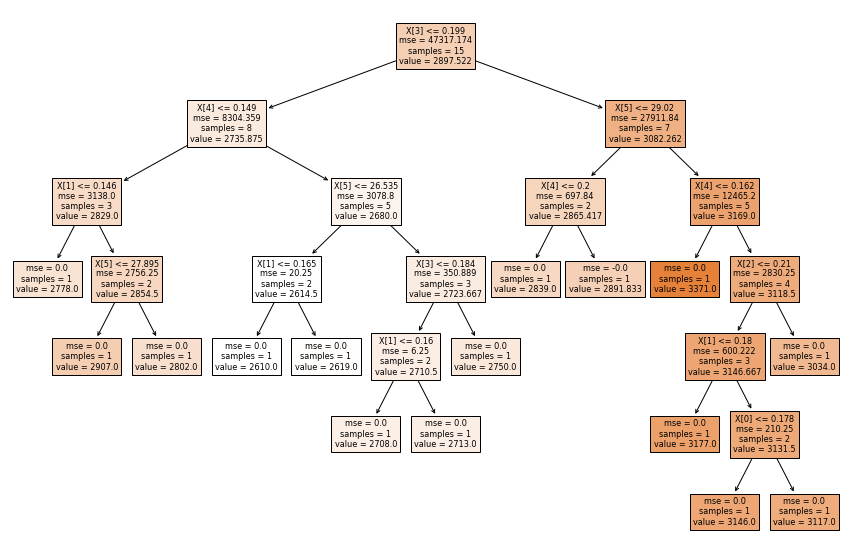

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dtree.fit(X_train, y_train), filled=True)
plt.show()

In [ ]:
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr1
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='Decision Tree EVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr1))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr1,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr1))

RMSE via prediction on training set:  0.0
Mean Absolute Error: [0.]
R squared via prediction on training set:  1.0


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y1,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y1))

RMSE via prediction on test set:  269.08325849075044
Mean Absolute Error: [221.4]
R squared via prediction on test set:  -0.5676594381127238


##Random Forest

In [ ]:
model_rf = RandomForestRegressor(n_estimators=5, max_depth=5, random_state=2)
model_rf.fit(X_train, y_train)
tr2 = model_rf.predict(X_train)
y2 = model_rf.predict(X_test)

In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr2
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='Random Forrest EVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr2))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr2,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr2))

RMSE via prediction on training set:  104.24556336485645
Mean Absolute Error: [72.2]
R squared via prediction on training set:  0.7703341797715736


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y2))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y2,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y2))

RMSE via prediction on test set:  175.81478891151343
Mean Absolute Error: [121.]
R squared via prediction on test set:  0.33074877888246035


##Non-Linear Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [ ]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 4
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min, degree_max+1):
    print('For degree ', degree)
    model = make_pipeline(
      PolynomialFeatures(degree, interaction_only=False), 
      LassoCV(
        eps=lasso_eps,
        n_alphas=lasso_nalpha,
        max_iter=lasso_iter, 
        normalize=True,cv=5
      )
    )
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    train_pred=np.array(model.predict(X_train))
    d = {'Yield': y_test, 'Predict': test_pred}
    temp_df = pd.DataFrame(data = d)
    temp_df = temp_df.sort_values('Yield')
    temp_df = temp_df.reset_index()

    # Print Figure
   
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test, y_test)
    MAE=mean_absolute_error(y_test,test_pred)
    print('RMSE = ', RMSE)
    print('MAE ', MAE)
    print('test_score = ', test_score)
    RMSE1=np.sqrt(np.sum(np.square(train_pred-y_train)))
    test_score1 = model.score(X_train, y_train)
    MAE1=mean_absolute_error(y_train,train_pred)
    print('RMSE = ', RMSE1)
    print('MAE ', MAE1)
    print('Train = ', test_score1)

For degree  2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2501.5458611614886, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 14090.725194817442, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 13442.6998949972, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 11574.37845266648, tolerance: 39.3242025

RMSE =  354.61161364463663
MAE  135.02687494219936
test_score =  0.4554794552098719
RMSE =  701.484181837631
MAE  151.94060205288332
Train =  0.3066927993473031
For degree  3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2563.434869709141, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4178.7396865036135, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4247.400958794888, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4558.46651094865, tolerance: 39.32420254

RMSE =  364.50348506541684
MAE  139.2367043595087
test_score =  0.424677007375054
RMSE =  704.4646243590668
MAE  152.96412913385672
Train =  0.30078888287911487
For degree  4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 591.294626530289, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2060.5854758280475, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 800.0851930600547, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2265.3135806894497, tolerance: 39.3242025

RMSE =  363.8011837180002
MAE  139.14253219766388
test_score =  0.4268918606253761
RMSE =  704.3790339961694
MAE  152.83012985212966
Train =  0.3009587767123819


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 394.5949145734147, tolerance: 53.92887477233982

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.1694169088638, tolerance: 53.92887477233982

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.3914852480368, tolerance: 53.92887477233982



In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = train_pred
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='Non Linear EVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

##Support Vector Regression (SVR) 

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
regr=SVR(kernel='linear',C=20,epsilon=15,degree=4)
regr.fit(X_train,y_train)
tr4 = regr.predict(X_train)
y4 = regr.predict(X_test)
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

R squared via prediction on training set:  0.055847661141398164


In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr4
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='SVR EVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr4))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr4,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

RMSE via prediction on training set:  211.3637152025089
Mean Absolute Error: [165.98485509]
R squared via prediction on training set:  0.055847661141398164


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y4))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y4,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y4))

RMSE via prediction on test set:  191.97964350127538
Mean Absolute Error: [164.94774887]
R squared via prediction on test set:  0.20202602628267596


## Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [ ]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(90, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(60, activation='relu'))
ann.add(tf.keras.layers.Dense(30, activation='linear'))
ann.add(tf.keras.layers.Dense(10, activation='linear'))
ann.add(tf.keras.layers.Dense(1))

In [ ]:
ann.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 90)                630       
_________________________________________________________________
dense_6 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 8,241
Trainable params: 8,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 464ms/step - loss: 8445550.0000 - mean_squared_error: 8445550.0000
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 8434449.0000 - mean_squared_error: 8434449.0000
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 8423357.0000 - mean_squared_error: 8423357.0000
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 8412194.0000 - mean_squared_error: 8412194.0000
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 8401118.0000 - mean_squared_error: 8401118.0000
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 8389877.0000 - mean_squared_error: 8389877.0000
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 8378378.5000 - mean_squared_error: 8378378.5000
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 8366689.5000 - mean_squared_error: 8366689.5000
Epoch 9/500
1/1 [============================

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = ann.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = ann.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

162.92378539179475
79.31265878864382


In [ ]:
pred_train = np.reshape(pred_train, (pred_train.shape[0]))

In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = pred_train
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='ANN EVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))

RMSE via prediction on training set:  162.92378539179475
Mean Absolute Error: [106.3875054]
R squared via prediction on training set:  0.439016368946202


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))

RMSE via prediction on test set:  79.31265878864382
Mean Absolute Error: [76.60322266]
R squared via prediction on test set:  0.8638043041335296


# NDVI + EVI

In [ ]:
from google.colab import drive
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import SVR

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/DATAFRAME_NDVIEVI_-_DATAFRAME_NDVIEVI.csv')

In [ ]:

df=df.set_index('year')

In [ ]:
dfndvi=df.copy()

In [ ]:
dfndvi.drop(['Unnamed: 0','eOct','eApr','eMay','LAI','nOct','nApr','nMay','eMean','nMean','Production','Rainfall'], axis=1, inplace=True)

In [ ]:
dfndvi

,nNov,nDec,nJan,nFeb,nMar,eNov,eDec,eJan,eFeb,eMar,Area,Yield
year,,,,,,,,,,,,
2000,0.205477,0.214600,0.231618,0.225767,0.201072,0.132783,0.138434,0.150869,0.151159,0.137191,27.490000,2778.000000
2001,0.220225,0.227810,0.250651,0.248579,0.230734,0.140879,0.145381,0.163560,0.167072,0.158622,25.730000,2708.000000
2002,0.178285,0.187111,0.206101,0.207492,0.194706,0.115123,0.120288,0.131459,0.139568,0.134199,26.340000,2762.000000
2003,0.242215,0.252126,0.266660,0.261027,0.227542,0.158818,0.163915,0.173033,0.172934,0.154694,25.200000,2610.000000
2004,0.233797,0.252087,0.263573,0.252415,0.225391,0.148147,0.161418,0.171633,0.167870,0.151652,26.590000,2713.000000
2005,0.238595,0.244888,0.255162,0.245133,0.210755,0.154162,0.158483,0.168876,0.165706,0.141588,26.380000,2602.000000
2006,0.241070,0.257106,0.272435,0.267724,0.234963,0.154649,0.165961,0.180417,0.175352,0.154543,26.480000,2619.000000
2007,0.232087,0.246437,0.260172,0.252693,0.227080,0.150545,0.158859,0.170309,0.171186,0.154262,27.990000,2708.000000
2008,0.241286,0.261694,0.272596,0.252552,0.215985,0.153952,0.166665,0.176006,0.167223,0.146345,28.040000,2802.000000


In [ ]:
dfndvi.corr()

,nNov,nDec,nJan,nFeb,nMar,eNov,eDec,eJan,eFeb,eMar,Area,Yield
nNov,1.000000,0.981828,0.962606,0.957936,0.895750,0.988018,0.970020,0.963382,0.956272,0.882376,0.624719,0.508922
nDec,0.981828,1.000000,0.988000,0.957910,0.875198,0.954769,0.983872,0.987692,0.948865,0.851052,0.677818,0.552264
nJan,0.962606,0.988000,1.000000,0.973945,0.897072,0.924782,0.959936,0.991619,0.959377,0.866750,0.709408,0.576846
nFeb,0.957936,0.957910,0.973945,1.000000,0.932026,0.920793,0.920453,0.958741,0.995012,0.904803,0.692712,0.592253
nMar,0.895750,0.875198,0.897072,0.932026,1.000000,0.860917,0.816270,0.862414,0.919147,0.992043,0.550880,0.434652
eNov,0.988018,0.954769,0.924782,0.920793,0.860917,1.000000,0.962457,0.935794,0.921900,0.851434,0.610442,0.480665
eDec,0.970020,0.983872,0.959936,0.920453,0.816270,0.962457,1.000000,0.978065,0.913080,0.790156,0.688010,0.549959
eJan,0.963382,0.987692,0.991619,0.958741,0.862414,0.935794,0.978065,1.000000,0.947340,0.828967,0.719354,0.566988
eFeb,0.956272,0.948865,0.959377,0.995012,0.919147,0.921900,0.913080,0.947340,1.000000,0.897507,0.683256,0.617561
eMar,0.882376,0.851052,0.866750,0.904803,0.992043,0.851434,0.790156,0.828967,0.897507,1.000000,0.498111,0.416875


In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Install plotlyExpress
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
y=dfndvi['Yield']
dfndvi = dfndvi.drop(['Yield'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfndvi, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(15, 11)
(5, 11)


In [ ]:

dtree = DecisionTreeRegressor(max_depth=5, random_state=5)
dtree.fit(X_train, y_train)
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

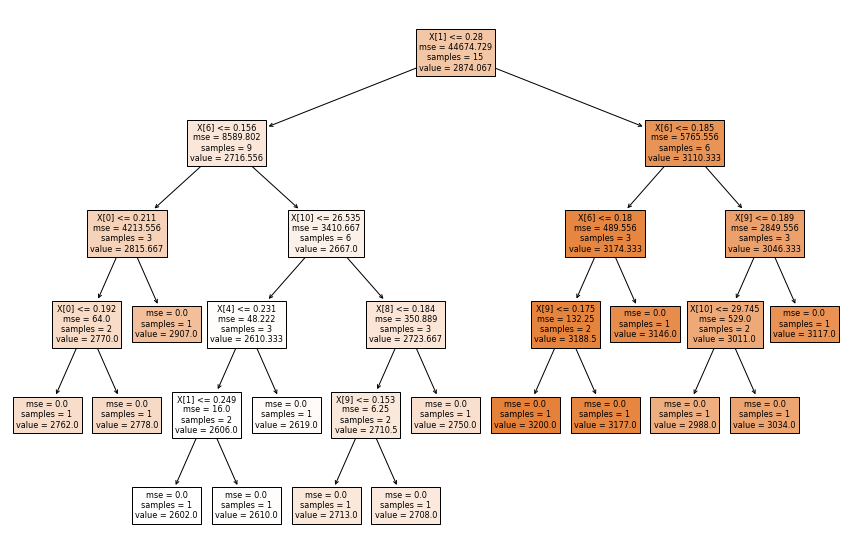

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dtree.fit(X_train, y_train), filled=True)
plt.show()

In [ ]:
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr1))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr1,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr1))

RMSE via prediction on training set:  0.0
Mean Absolute Error: [0.]
R squared via prediction on training set:  1.0


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y1,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y1))

RMSE via prediction on test set:  219.86679054731704
Mean Absolute Error: [204.4333334]
R squared via prediction on test set:  0.10344513386904253


##Random Forest

In [ ]:
model_rf = RandomForestRegressor(n_estimators=5, max_depth=5, random_state=2)
model_rf.fit(X_train, y_train)
tr2 = model_rf.predict(X_train)
y2 = model_rf.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr2))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr2,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr2))

RMSE via prediction on training set:  59.4858190383781
Mean Absolute Error: [43.88]
R squared via prediction on training set:  0.9207927444737836


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y2))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y2,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y2))

RMSE via prediction on test set:  270.29702226324605
Mean Absolute Error: [233.8733334]
R squared via prediction on test set:  -0.3550025757733388


##Non-Linear Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [ ]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 4
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min, degree_max+1):
    print('For degree ', degree)
    model = make_pipeline(
      PolynomialFeatures(degree, interaction_only=False), 
      LassoCV(
        eps=lasso_eps,
        n_alphas=lasso_nalpha,
        max_iter=lasso_iter, 
        normalize=True,cv=5
      )
    )
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    train_pred=np.array(model.predict(X_train))
    d = {'Yield': y_test, 'Predict': test_pred}
    temp_df = pd.DataFrame(data = d)
    temp_df = temp_df.sort_values('Yield')
    temp_df = temp_df.reset_index()

    # Print Figure
   
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test, y_test)
    MAE=mean_absolute_error(y_test,test_pred)
    print('RMSE = ', RMSE)
    print('MAE ', MAE)
    print('test_score = ', test_score)
    RMSE1=np.sqrt(np.sum(np.square(train_pred-y_train)))
    test_score1 = model.score(X_train, y_train)
    MAE1=mean_absolute_error(y_train,train_pred)
    print('RMSE = ', RMSE1)
    print('MAE ', MAE1)
    print('Train = ', test_score1)

For degree  2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 412.3288400287129, tolerance: 43.160691666666665

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 728.3646096057018, tolerance: 43.160691666666665

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3689.7717752048247, tolerance: 43.160691666666665

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3123.32680052917, tolerance: 43.16069

RMSE =  548.2549077086119
MAE  173.19296202822662
test_score =  -0.11494296029125017
RMSE =  488.0313533497205
MAE  107.79227322779337
Train =  0.6445796721083981
For degree  3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 163.37052236164163, tolerance: 43.160691666666665

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 112.73336118465522, tolerance: 43.160691666666665

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 469.9113055449852, tolerance: 43.160691666666665

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 772.1857035216162, tolerance: 43.160

RMSE =  541.5845324727627
MAE  167.01359690971304
test_score =  -0.08797796307418704
RMSE =  487.39944724655527
MAE  107.20081060886592
Train =  0.6454994772442354
For degree  4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.57988742041925, tolerance: 43.160691666666665

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.52581298303267, tolerance: 43.160691666666665

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 156.79412230980597, tolerance: 43.160691666666665

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 292.84439899326753, tolerance: 43.16

RMSE =  536.8567451462212
MAE  166.444233339349
test_score =  -0.06906576410898424
RMSE =  527.2855734735367
MAE  118.24507138500506
Train =  0.5851046249065346


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 145.09573733315798, tolerance: 55.315966666666675



##Support Vector Regression (SVR) 

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
regr=SVR(kernel='linear',C=20,epsilon=15,degree=4)
regr.fit(X_train,y_train)
tr4 = regr.predict(X_train)
y4 = regr.predict(X_test)
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

R squared via prediction on training set:  0.0806765223665935


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr4))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr4,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

RMSE via prediction on training set:  202.6586468040852
Mean Absolute Error: [167.17662772]
R squared via prediction on training set:  0.0806765223665935


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y4))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y4,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y4))

RMSE via prediction on test set:  253.15221608302264
Mean Absolute Error: [149.3442788]
R squared via prediction on test set:  -0.18855987653875594


##Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [ ]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(90, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(60, activation='relu'))
ann.add(tf.keras.layers.Dense(30, activation='linear'))
ann.add(tf.keras.layers.Dense(10, activation='linear'))
ann.add(tf.keras.layers.Dense(1))

In [ ]:
ann.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
ann.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 90)                1080      
_________________________________________________________________
dense_16 (Dense)             (None, 60)                5460      
_________________________________________________________________
dense_17 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 8,691
Trainable params: 8,691
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 434ms/step - loss: 8283953.0000 - mean_squared_error: 8283953.0000
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 8272482.0000 - mean_squared_error: 8272482.0000
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 8260822.5000 - mean_squared_error: 8260822.5000
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 8248928.0000 - mean_squared_error: 8248928.0000
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 8236757.0000 - mean_squared_error: 8236757.0000
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 8224521.5000 - mean_squared_error: 8224521.5000
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 8212041.5000 - mean_squared_error: 8212041.5000
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 8199163.5000 - mean_squared_error: 8199163.5000
Epoch 9/500
1/1 [============================

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = ann.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = ann.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

135.46924594167987
178.8989768517795


In [ ]:
pred_train = np.reshape(pred_train, (pred_train.shape[0]))

In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = pred_train
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='ANN NDVI+EVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
temp_df = y_test.to_frame()
temp_df['Pred_Yield'] = pred
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='ANN NDVI+EVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))

RMSE via prediction on training set:  135.46924594167987
Mean Absolute Error: [97.11552734]
R squared via prediction on training set:  0.5892103421231578


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))

RMSE via prediction on test set:  178.8989768517795
Mean Absolute Error: [113.59313144]
R squared via prediction on test set:  0.40642812910770265


# LAI

In [ ]:
from google.colab import drive
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import SVR

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/DATAFRAME_NDVIEVI_-_DATAFRAME_NDVIEVI.csv')
#df2=pd.read_csv('/content/yeet.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/frax0n/datasetsorstuff/main/yeet.csv')
df=df.set_index('year')
df2=df2.set_index('Year')
df

,Unnamed: 0,nOct,nNov,nDec,nJan,nFeb,nMar,nApr,nMay,nMean,eOct,eNov,eDec,eJan,eFeb,eMar,eApr,eMay,eMean,Area,Production,Yield,LAI,Rainfall
year,,,,,,,,,,,,,,,,,,,,,,,,
2000,0,0.253092,0.205477,0.214600,0.231618,0.225767,0.201072,0.166901,0.146278,0.205601,0.168545,0.132783,0.138434,0.150869,0.151159,0.137191,0.114986,0.102854,0.137103,27.490000,76.370000,2778.000000,0.291067,37.809430
2001,1,0.252050,0.220225,0.227810,0.250651,0.248579,0.230734,0.169408,0.146951,0.218301,0.165846,0.140879,0.145381,0.163560,0.167072,0.158622,0.118505,0.103027,0.145362,25.730000,69.680000,2708.000000,0.291067,45.907669
2002,2,0.200088,0.178285,0.187111,0.206101,0.207492,0.194706,0.161110,0.138828,0.184215,0.134577,0.115123,0.120288,0.131459,0.139568,0.134199,0.111805,0.097714,0.123092,26.340000,72.770000,2762.000000,0.291067,20.676182
2003,3,0.299165,0.242215,0.252126,0.266660,0.261027,0.227542,0.168698,0.159793,0.234653,0.197742,0.158818,0.163915,0.173033,0.172934,0.154694,0.117378,0.110974,0.156186,25.200000,65.760000,2610.000000,0.370912,48.679591
2004,4,0.267995,0.233797,0.252087,0.263573,0.252415,0.225391,0.164787,0.154184,0.226779,0.172131,0.148147,0.161418,0.171633,0.167870,0.151652,0.112510,0.107000,0.149045,26.590000,72.160000,2713.000000,0.407855,41.511458
2005,5,0.296144,0.238595,0.244888,0.255162,0.245133,0.210755,0.164522,0.147785,0.225373,0.196240,0.154162,0.158483,0.168876,0.165706,0.141588,0.112439,0.102569,0.150008,26.380000,68.640000,2602.000000,0.425636,43.397656
2006,6,0.270448,0.241070,0.257106,0.272435,0.267724,0.234963,0.185652,0.162515,0.236489,0.178645,0.154649,0.165961,0.180417,0.175352,0.154543,0.126178,0.113756,0.156188,26.480000,69.350000,2619.000000,0.406170,50.427344
2007,7,0.288058,0.232087,0.246437,0.260172,0.252693,0.227080,0.173423,0.158299,0.229781,0.192510,0.150545,0.158859,0.170309,0.171186,0.154262,0.118173,0.109261,0.153138,27.990000,75.810000,2708.000000,0.424946,40.602344
2008,8,0.269548,0.241286,0.261694,0.272596,0.252552,0.215985,0.166817,0.151305,0.228973,0.175850,0.153952,0.166665,0.176006,0.167223,0.146345,0.112948,0.103940,0.150366,28.040000,78.570000,2802.000000,0.423478,44.523698


In [ ]:
df2

,1,2,3,4,5,9,10,11,12
Year,,,,,,,,,
2000,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.263251,0.261208
2001,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.267538,0.261208
2002,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.263251,0.261208
2003,0.346547,0.391012,0.309922,0.238323,0.227154,0.734040,0.496548,0.377273,0.380180
2004,0.487838,0.516810,0.341926,0.252870,0.407804,0.562738,0.442536,0.359554,0.402657
2005,0.518147,0.489011,0.348335,0.256611,0.255911,0.764234,0.530644,0.392043,0.386440
2006,0.496080,0.476939,0.322247,0.251118,0.255975,0.586966,0.457920,0.381729,0.423684
2007,0.541433,0.531705,0.373152,0.280445,0.275158,0.714891,0.472411,0.350243,0.365935
2008,0.478498,0.532172,0.391603,0.267538,0.460727,0.653916,0.446325,0.365608,0.410525


In [ ]:
df3 = df.join(df2)

In [ ]:
df3.interpolate(axis=0)

,Unnamed: 0,nOct,nNov,nDec,nJan,nFeb,nMar,nApr,nMay,nMean,eOct,eNov,eDec,eJan,eFeb,eMar,eApr,eMay,eMean,Area,Production,Yield,LAI,Rainfall,1,2,3,4,5,9,10,11,12
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,0,0.253092,0.205477,0.214600,0.231618,0.225767,0.201072,0.166901,0.146278,0.205601,0.168545,0.132783,0.138434,0.150869,0.151159,0.137191,0.114986,0.102854,0.137103,27.490000,76.370000,2778.000000,0.291067,37.809430,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.263251,0.261208
2001,1,0.252050,0.220225,0.227810,0.250651,0.248579,0.230734,0.169408,0.146951,0.218301,0.165846,0.140879,0.145381,0.163560,0.167072,0.158622,0.118505,0.103027,0.145362,25.730000,69.680000,2708.000000,0.291067,45.907669,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.267538,0.261208
2002,2,0.200088,0.178285,0.187111,0.206101,0.207492,0.194706,0.161110,0.138828,0.184215,0.134577,0.115123,0.120288,0.131459,0.139568,0.134199,0.111805,0.097714,0.123092,26.340000,72.770000,2762.000000,0.291067,20.676182,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.263251,0.261208
2003,3,0.299165,0.242215,0.252126,0.266660,0.261027,0.227542,0.168698,0.159793,0.234653,0.197742,0.158818,0.163915,0.173033,0.172934,0.154694,0.117378,0.110974,0.156186,25.200000,65.760000,2610.000000,0.370912,48.679591,0.346547,0.391012,0.309922,0.238323,0.227154,0.734040,0.496548,0.377273,0.380180
2004,4,0.267995,0.233797,0.252087,0.263573,0.252415,0.225391,0.164787,0.154184,0.226779,0.172131,0.148147,0.161418,0.171633,0.167870,0.151652,0.112510,0.107000,0.149045,26.590000,72.160000,2713.000000,0.407855,41.511458,0.487838,0.516810,0.341926,0.252870,0.407804,0.562738,0.442536,0.359554,0.402657
2005,5,0.296144,0.238595,0.244888,0.255162,0.245133,0.210755,0.164522,0.147785,0.225373,0.196240,0.154162,0.158483,0.168876,0.165706,0.141588,0.112439,0.102569,0.150008,26.380000,68.640000,2602.000000,0.425636,43.397656,0.518147,0.489011,0.348335,0.256611,0.255911,0.764234,0.530644,0.392043,0.386440
2006,6,0.270448,0.241070,0.257106,0.272435,0.267724,0.234963,0.185652,0.162515,0.236489,0.178645,0.154649,0.165961,0.180417,0.175352,0.154543,0.126178,0.113756,0.156188,26.480000,69.350000,2619.000000,0.406170,50.427344,0.496080,0.476939,0.322247,0.251118,0.255975,0.586966,0.457920,0.381729,0.423684
2007,7,0.288058,0.232087,0.246437,0.260172,0.252693,0.227080,0.173423,0.158299,0.229781,0.192510,0.150545,0.158859,0.170309,0.171186,0.154262,0.118173,0.109261,0.153138,27.990000,75.810000,2708.000000,0.424946,40.602344,0.541433,0.531705,0.373152,0.280445,0.275158,0.714891,0.472411,0.350243,0.365935
2008,8,0.269548,0.241286,0.261694,0.272596,0.252552,0.215985,0.166817,0.151305,0.228973,0.175850,0.153952,0.166665,0.176006,0.167223,0.146345,0.112948,0.103940,0.150366,28.040000,78.570000,2802.000000,0.423478,44.523698,0.478498,0.532172,0.391603,0.267538,0.460727,0.653916,0.446325,0.365608,0.410525


In [ ]:

dfevi=df3.copy()
dfevi.drop(['Unnamed: 0','nOct','nNov','nDec','nJan','nFeb','nMar','nApr','nMay','eOct','eNov','eDec','eJan','eFeb','eMar','eApr','eMay','nMean','eOct','eApr','eMay','eMean','LAI','10','4','5','9','Production','Rainfall'], axis=1, inplace=True)
dfevi

,Area,Yield,1,2,3,11,12
year,,,,,,,
2000,27.490000,2778.000000,0.346547,0.391012,0.309922,0.263251,0.261208
2001,25.730000,2708.000000,0.346547,0.391012,0.309922,0.267538,0.261208
2002,26.340000,2762.000000,0.346547,0.391012,0.309922,0.263251,0.261208
2003,25.200000,2610.000000,0.346547,0.391012,0.309922,0.377273,0.380180
2004,26.590000,2713.000000,0.487838,0.516810,0.341926,0.359554,0.402657
2005,26.380000,2602.000000,0.518147,0.489011,0.348335,0.392043,0.386440
2006,26.480000,2619.000000,0.496080,0.476939,0.322247,0.381729,0.423684
2007,27.990000,2708.000000,0.541433,0.531705,0.373152,0.350243,0.365935
2008,28.040000,2802.000000,0.478498,0.532172,0.391603,0.365608,0.410525


In [ ]:
dfevi=dfevi.dropna()

In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Install plotlyExpress
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

In [ ]:
y=dfevi['Yield']
dfevi = dfevi.drop(['Yield'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfevi, y, test_size=0.25, random_state=7)
print(X_train.shape)
print(X_test.shape)

(15, 6)
(5, 6)


In [ ]:

dtree = DecisionTreeRegressor(max_depth=6, random_state=5)
dtree.fit(X_train, y_train)
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

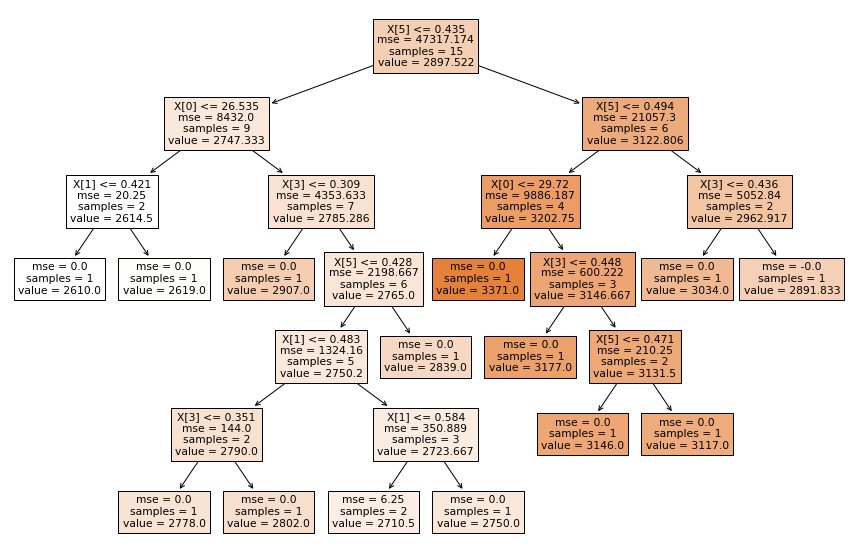

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dtree.fit(X_train, y_train), filled=True)
plt.show()

In [ ]:
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr1
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='Decision Tree LAI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr1))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr1,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr1))

RMSE via prediction on training set:  0.9128709291752769
Mean Absolute Error: [0.33333333]
R squared via prediction on training set:  0.9999823883535243


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y1,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y1))

RMSE via prediction on test set:  189.84994074268235
Mean Absolute Error: [134.6]
R squared via prediction on test set:  0.21963227907298988


##Random Forest

In [ ]:
model_rf = RandomForestRegressor(n_estimators=5, max_depth=5, random_state=2)
model_rf.fit(X_train, y_train)
tr2 = model_rf.predict(X_train)
y2 = model_rf.predict(X_test)

In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr2
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='RandomForest LAI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr2))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr2,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr2))

RMSE via prediction on training set:  97.18597332102638
Mean Absolute Error: [67.70444447]
R squared via prediction on training set:  0.8003872020317007


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y2))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y2,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y2))

RMSE via prediction on test set:  97.45195510024641
Mean Absolute Error: [88.18666664]
R squared via prediction on test set:  0.794382782397278


##Non-Linear Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [ ]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 4
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min, degree_max+1):
    print('For degree ', degree)
    model = make_pipeline(
      PolynomialFeatures(degree, interaction_only=False), 
      LassoCV(
        eps=lasso_eps,
        n_alphas=lasso_nalpha,
        max_iter=lasso_iter, 
        normalize=True,cv=5
      )
    )
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    train_pred=np.array(model.predict(X_train))
    d = {'Yield': y_test, 'Predict': test_pred}
    temp_df = pd.DataFrame(data = d)
    temp_df = temp_df.sort_values('Yield')
    temp_df = temp_df.reset_index()

    # Print Figure
   
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test, y_test)
    MAE=mean_absolute_error(y_test,test_pred)
    print('RMSE = ', RMSE)
    print('MAE ', MAE)
    print('test_score = ', test_score)
    RMSE1=np.sqrt(np.sum(np.square(train_pred-y_train)))
    test_score1 = model.score(X_train, y_train)
    MAE1=mean_absolute_error(y_train,train_pred)
    print('RMSE = ', RMSE1)
    print('MAE ', MAE1)
    print('Train = ', test_score1)

For degree  2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.2056449259399, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6800.861043052195, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 10346.669559637565, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 8189.7076987879955, tolerance: 39.324202

RMSE =  276.30661488418116
MAE  88.9087874594774
test_score =  0.669409076849191
RMSE =  640.4071456552825
MAE  130.8795656642709
Train =  0.42216707497879163
For degree  3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3848.6514578775823, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 10054.009294028474, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 10918.264859484065, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 7444.795374098643, tolerance: 39.32420

RMSE =  266.72649384674605
MAE  86.96373587553235
test_score =  0.6919361965229404
RMSE =  637.8840369396344
MAE  131.34746318090245
Train =  0.4267112568334049
For degree  4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 6831.3936513147155, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2703.2204440182713, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3009.1860059939754, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2025.1364298265278, tolerance: 39.3242

RMSE =  348.5063774251242
MAE  126.80182875291139
test_score =  0.474067728262449
RMSE =  704.5240799457179
MAE  150.67446037076627
Train =  0.30067085349899736


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.35241054119848, tolerance: 53.92887477233982

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 119.25664811096856, tolerance: 53.92887477233982

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.0228175730484, tolerance: 53.92887477233982



In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = train_pred
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='NonLinear LAI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

##Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
regr=SVR(kernel='linear',C=20,epsilon=15,degree=4)
regr.fit(X_train,y_train)
tr4 = regr.predict(X_train)
y4 = regr.predict(X_test)
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

R squared via prediction on training set:  0.05734697420454771


In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr4
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='SVR LAI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr4))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr4,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

RMSE via prediction on training set:  211.19582582936323
Mean Absolute Error: [165.84364895]
R squared via prediction on training set:  0.05734697420454771


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y4))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y4,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y4))

RMSE via prediction on test set:  191.71941243784534
Mean Absolute Error: [164.64515086]
R squared via prediction on test set:  0.20418788959900924


##Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [ ]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(90, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(60, activation='relu'))
ann.add(tf.keras.layers.Dense(30, activation='linear'))
ann.add(tf.keras.layers.Dense(10, activation='linear'))
ann.add(tf.keras.layers.Dense(1))

In [ ]:
ann.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
ann.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 90)                630       
_________________________________________________________________
dense_11 (Dense)             (None, 60)                5460      
_________________________________________________________________
dense_12 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 8,241
Trainable params: 8,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.fit(X_train, y_train, epochs=250)

Epoch 1/250
1/1 [==============================] - 0s 421ms/step - loss: 8427594.0000 - mean_squared_error: 8427594.0000
Epoch 2/250
1/1 [==============================] - 0s 8ms/step - loss: 8416508.0000 - mean_squared_error: 8416508.0000
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 8405248.0000 - mean_squared_error: 8405248.0000
Epoch 4/250
1/1 [==============================] - 0s 4ms/step - loss: 8393938.0000 - mean_squared_error: 8393938.0000
Epoch 5/250
1/1 [==============================] - 0s 8ms/step - loss: 8382361.5000 - mean_squared_error: 8382361.5000
Epoch 6/250
1/1 [==============================] - 0s 7ms/step - loss: 8370500.5000 - mean_squared_error: 8370500.5000
Epoch 7/250
1/1 [==============================] - 0s 8ms/step - loss: 8358434.0000 - mean_squared_error: 8358434.0000
Epoch 8/250
1/1 [==============================] - 0s 6ms/step - loss: 8345986.0000 - mean_squared_error: 8345986.0000
Epoch 9/250
1/1 [=============================

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = ann.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = ann.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

162.5667219561348
84.61872166413995


In [ ]:
pred_train = np.reshape(pred_train, (pred_train.shape[0]))

In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = pred_train
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='ANN LAI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))

RMSE via prediction on training set:  162.5667219561348
Mean Absolute Error: [105.78661569]
R squared via prediction on training set:  0.4414725756473613


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))

RMSE via prediction on test set:  84.61872166413995
Mean Absolute Error: [79.08818359]
R squared via prediction on test set:  0.844971592647461


# NDVI+EVI+LAI

In [ ]:
from google.colab import drive
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import SVR

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/DATAFRAME_NDVIEVI_-_DATAFRAME_NDVIEVI.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/frax0n/datasetsorstuff/main/yeet.csv')
df=df.set_index('year')
df2=df2.set_index('Year')
df

,Unnamed: 0,nOct,nNov,nDec,nJan,nFeb,nMar,nApr,nMay,nMean,eOct,eNov,eDec,eJan,eFeb,eMar,eApr,eMay,eMean,Area,Production,Yield,LAI,Rainfall
year,,,,,,,,,,,,,,,,,,,,,,,,
2000,0,0.253092,0.205477,0.214600,0.231618,0.225767,0.201072,0.166901,0.146278,0.205601,0.168545,0.132783,0.138434,0.150869,0.151159,0.137191,0.114986,0.102854,0.137103,27.490000,76.370000,2778.000000,0.291067,37.809430
2001,1,0.252050,0.220225,0.227810,0.250651,0.248579,0.230734,0.169408,0.146951,0.218301,0.165846,0.140879,0.145381,0.163560,0.167072,0.158622,0.118505,0.103027,0.145362,25.730000,69.680000,2708.000000,0.291067,45.907669
2002,2,0.200088,0.178285,0.187111,0.206101,0.207492,0.194706,0.161110,0.138828,0.184215,0.134577,0.115123,0.120288,0.131459,0.139568,0.134199,0.111805,0.097714,0.123092,26.340000,72.770000,2762.000000,0.291067,20.676182
2003,3,0.299165,0.242215,0.252126,0.266660,0.261027,0.227542,0.168698,0.159793,0.234653,0.197742,0.158818,0.163915,0.173033,0.172934,0.154694,0.117378,0.110974,0.156186,25.200000,65.760000,2610.000000,0.370912,48.679591
2004,4,0.267995,0.233797,0.252087,0.263573,0.252415,0.225391,0.164787,0.154184,0.226779,0.172131,0.148147,0.161418,0.171633,0.167870,0.151652,0.112510,0.107000,0.149045,26.590000,72.160000,2713.000000,0.407855,41.511458
2005,5,0.296144,0.238595,0.244888,0.255162,0.245133,0.210755,0.164522,0.147785,0.225373,0.196240,0.154162,0.158483,0.168876,0.165706,0.141588,0.112439,0.102569,0.150008,26.380000,68.640000,2602.000000,0.425636,43.397656
2006,6,0.270448,0.241070,0.257106,0.272435,0.267724,0.234963,0.185652,0.162515,0.236489,0.178645,0.154649,0.165961,0.180417,0.175352,0.154543,0.126178,0.113756,0.156188,26.480000,69.350000,2619.000000,0.406170,50.427344
2007,7,0.288058,0.232087,0.246437,0.260172,0.252693,0.227080,0.173423,0.158299,0.229781,0.192510,0.150545,0.158859,0.170309,0.171186,0.154262,0.118173,0.109261,0.153138,27.990000,75.810000,2708.000000,0.424946,40.602344
2008,8,0.269548,0.241286,0.261694,0.272596,0.252552,0.215985,0.166817,0.151305,0.228973,0.175850,0.153952,0.166665,0.176006,0.167223,0.146345,0.112948,0.103940,0.150366,28.040000,78.570000,2802.000000,0.423478,44.523698


In [ ]:
df2

,1,2,3,4,5,9,10,11,12
Year,,,,,,,,,
2000,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.263251,0.261208
2001,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.267538,0.261208
2002,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.263251,0.261208
2003,0.346547,0.391012,0.309922,0.238323,0.227154,0.734040,0.496548,0.377273,0.380180
2004,0.487838,0.516810,0.341926,0.252870,0.407804,0.562738,0.442536,0.359554,0.402657
2005,0.518147,0.489011,0.348335,0.256611,0.255911,0.764234,0.530644,0.392043,0.386440
2006,0.496080,0.476939,0.322247,0.251118,0.255975,0.586966,0.457920,0.381729,0.423684
2007,0.541433,0.531705,0.373152,0.280445,0.275158,0.714891,0.472411,0.350243,0.365935
2008,0.478498,0.532172,0.391603,0.267538,0.460727,0.653916,0.446325,0.365608,0.410525


In [ ]:
df3 = df.join(df2)

In [ ]:
df3.interpolate(axis=0)

,Unnamed: 0,nOct,nNov,nDec,nJan,nFeb,nMar,nApr,nMay,nMean,eOct,eNov,eDec,eJan,eFeb,eMar,eApr,eMay,eMean,Area,Production,Yield,LAI,Rainfall,1,2,3,4,5,9,10,11,12
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,0,0.253092,0.205477,0.214600,0.231618,0.225767,0.201072,0.166901,0.146278,0.205601,0.168545,0.132783,0.138434,0.150869,0.151159,0.137191,0.114986,0.102854,0.137103,27.490000,76.370000,2778.000000,0.291067,37.809430,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.263251,0.261208
2001,1,0.252050,0.220225,0.227810,0.250651,0.248579,0.230734,0.169408,0.146951,0.218301,0.165846,0.140879,0.145381,0.163560,0.167072,0.158622,0.118505,0.103027,0.145362,25.730000,69.680000,2708.000000,0.291067,45.907669,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.267538,0.261208
2002,2,0.200088,0.178285,0.187111,0.206101,0.207492,0.194706,0.161110,0.138828,0.184215,0.134577,0.115123,0.120288,0.131459,0.139568,0.134199,0.111805,0.097714,0.123092,26.340000,72.770000,2762.000000,0.291067,20.676182,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.263251,0.261208
2003,3,0.299165,0.242215,0.252126,0.266660,0.261027,0.227542,0.168698,0.159793,0.234653,0.197742,0.158818,0.163915,0.173033,0.172934,0.154694,0.117378,0.110974,0.156186,25.200000,65.760000,2610.000000,0.370912,48.679591,0.346547,0.391012,0.309922,0.238323,0.227154,0.734040,0.496548,0.377273,0.380180
2004,4,0.267995,0.233797,0.252087,0.263573,0.252415,0.225391,0.164787,0.154184,0.226779,0.172131,0.148147,0.161418,0.171633,0.167870,0.151652,0.112510,0.107000,0.149045,26.590000,72.160000,2713.000000,0.407855,41.511458,0.487838,0.516810,0.341926,0.252870,0.407804,0.562738,0.442536,0.359554,0.402657
2005,5,0.296144,0.238595,0.244888,0.255162,0.245133,0.210755,0.164522,0.147785,0.225373,0.196240,0.154162,0.158483,0.168876,0.165706,0.141588,0.112439,0.102569,0.150008,26.380000,68.640000,2602.000000,0.425636,43.397656,0.518147,0.489011,0.348335,0.256611,0.255911,0.764234,0.530644,0.392043,0.386440
2006,6,0.270448,0.241070,0.257106,0.272435,0.267724,0.234963,0.185652,0.162515,0.236489,0.178645,0.154649,0.165961,0.180417,0.175352,0.154543,0.126178,0.113756,0.156188,26.480000,69.350000,2619.000000,0.406170,50.427344,0.496080,0.476939,0.322247,0.251118,0.255975,0.586966,0.457920,0.381729,0.423684
2007,7,0.288058,0.232087,0.246437,0.260172,0.252693,0.227080,0.173423,0.158299,0.229781,0.192510,0.150545,0.158859,0.170309,0.171186,0.154262,0.118173,0.109261,0.153138,27.990000,75.810000,2708.000000,0.424946,40.602344,0.541433,0.531705,0.373152,0.280445,0.275158,0.714891,0.472411,0.350243,0.365935
2008,8,0.269548,0.241286,0.261694,0.272596,0.252552,0.215985,0.166817,0.151305,0.228973,0.175850,0.153952,0.166665,0.176006,0.167223,0.146345,0.112948,0.103940,0.150366,28.040000,78.570000,2802.000000,0.423478,44.523698,0.478498,0.532172,0.391603,0.267538,0.460727,0.653916,0.446325,0.365608,0.410525


In [ ]:

dfevi=df3.copy()
dfevi.drop(['Unnamed: 0','nOct','nMean','eMean','nApr','nMay','eOct','eApr','eMay','eOct','eApr','eMay','LAI','10','4','5','Production'], axis=1, inplace=True)
dfevi

,nNov,nDec,nJan,nFeb,nMar,eNov,eDec,eJan,eFeb,eMar,Area,Yield,Rainfall,1,2,3,9,11,12
year,,,,,,,,,,,,,,,,,,,
2000,0.205477,0.214600,0.231618,0.225767,0.201072,0.132783,0.138434,0.150869,0.151159,0.137191,27.490000,2778.000000,37.809430,0.346547,0.391012,0.309922,0.420106,0.263251,0.261208
2001,0.220225,0.227810,0.250651,0.248579,0.230734,0.140879,0.145381,0.163560,0.167072,0.158622,25.730000,2708.000000,45.907669,0.346547,0.391012,0.309922,0.420106,0.267538,0.261208
2002,0.178285,0.187111,0.206101,0.207492,0.194706,0.115123,0.120288,0.131459,0.139568,0.134199,26.340000,2762.000000,20.676182,0.346547,0.391012,0.309922,0.420106,0.263251,0.261208
2003,0.242215,0.252126,0.266660,0.261027,0.227542,0.158818,0.163915,0.173033,0.172934,0.154694,25.200000,2610.000000,48.679591,0.346547,0.391012,0.309922,0.734040,0.377273,0.380180
2004,0.233797,0.252087,0.263573,0.252415,0.225391,0.148147,0.161418,0.171633,0.167870,0.151652,26.590000,2713.000000,41.511458,0.487838,0.516810,0.341926,0.562738,0.359554,0.402657
2005,0.238595,0.244888,0.255162,0.245133,0.210755,0.154162,0.158483,0.168876,0.165706,0.141588,26.380000,2602.000000,43.397656,0.518147,0.489011,0.348335,0.764234,0.392043,0.386440
2006,0.241070,0.257106,0.272435,0.267724,0.234963,0.154649,0.165961,0.180417,0.175352,0.154543,26.480000,2619.000000,50.427344,0.496080,0.476939,0.322247,0.586966,0.381729,0.423684
2007,0.232087,0.246437,0.260172,0.252693,0.227080,0.150545,0.158859,0.170309,0.171186,0.154262,27.990000,2708.000000,40.602344,0.541433,0.531705,0.373152,0.714891,0.350243,0.365935
2008,0.241286,0.261694,0.272596,0.252552,0.215985,0.153952,0.166665,0.176006,0.167223,0.146345,28.040000,2802.000000,44.523698,0.478498,0.532172,0.391603,0.653916,0.365608,0.410525


In [ ]:
dfevi=dfevi.dropna()

In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Install plotlyExpress
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

In [ ]:
y=dfevi['Yield']
dfevi = dfevi.drop(['Yield'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfevi, y, test_size=0.25, random_state=7)
print(X_train.shape)
print(X_test.shape)

(15, 18)
(5, 18)


In [ ]:

dtree = DecisionTreeRegressor(max_depth=6, random_state=5)
dtree.fit(X_train, y_train)
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

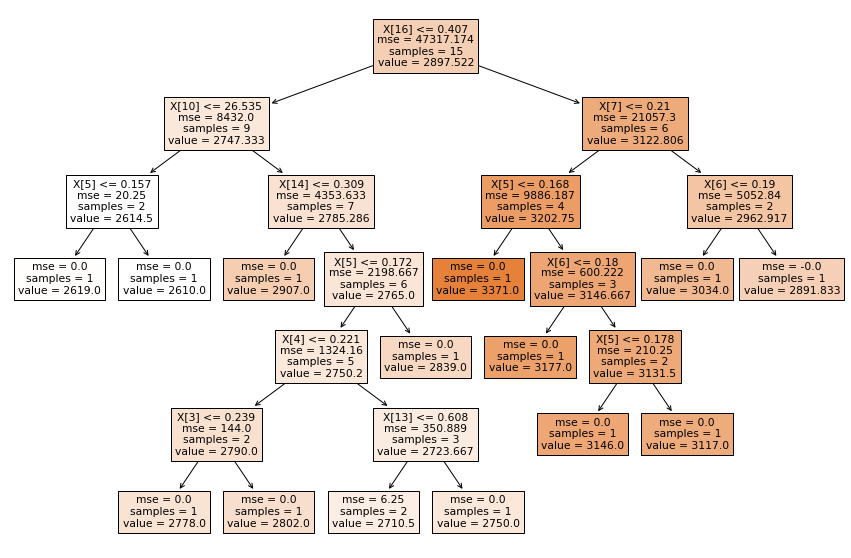

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dtree.fit(X_train, y_train), filled=True)
plt.show()

In [ ]:
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr1
temp_df.sort_index(inplace=True)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr1))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr1,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr1))

RMSE via prediction on training set:  0.9128709291752769
Mean Absolute Error: [0.33333333]
R squared via prediction on training set:  0.9999823883535243


In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(width=800,height=600)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
temp_df = y_test.to_frame()
temp_df['Pred_Yield'] = y1
temp_df.sort_index(inplace=True)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y1,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y1))

RMSE via prediction on test set:  222.62075374951007
Mean Absolute Error: [165.6]
R squared via prediction on test set:  -0.07302456091731035


In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(width=800,height=600)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




##Random Forest

In [ ]:
model_rf = RandomForestRegressor(n_estimators=5, max_depth=5, random_state=2)
model_rf.fit(X_train, y_train)
tr2 = model_rf.predict(X_train)
y2 = model_rf.predict(X_test)

In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr2
temp_df.sort_index(inplace=True)

In [252]:
real_y = y_train.append(y_test)
pred_y = np.append(tr2, y2)
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(real_y,pred_y))) 
print('R squared via prediction on training set: ', r2_score(real_y, pred_y))
temp_df = pd.DataFrame(real_y, index=real_y.index)
temp_df['Pred Y'] = pred_y
temp_df.sort_index(inplace=True)
temp_df['Year'] = np.arange(2000, 2020)

RMSE via prediction on training set:  104.19098864873523
R squared via prediction on training set:  0.7710876755208954


In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(width=800,height=600)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
temp_df = y_test.to_frame()
temp_df['Pred_Yield'] = y2
temp_df.sort_index(inplace=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(width=800,height=600)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr2))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr2,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr2))

RMSE via prediction on training set:  112.40842267138096
Mean Absolute Error: [74.65777781]
R squared via prediction on training set:  0.7329584053457663


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y2))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y2,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y2))

RMSE via prediction on test set:  74.27037094292714
Mean Absolute Error: [53.72]
R squared via prediction on test set:  0.8805710673086916


##Non-Linear Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [ ]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 4
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min, degree_max+1):
    print('For degree ', degree)
    model = make_pipeline(
      PolynomialFeatures(degree, interaction_only=False), 
      LassoCV(
        eps=lasso_eps,
        n_alphas=lasso_nalpha,
        max_iter=lasso_iter, 
        normalize=True,cv=5
      )
    )
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    train_pred=np.array(model.predict(X_train))
    d = {'Yield': y_test, 'Predict': test_pred}
    temp_df = pd.DataFrame(data = d)
    temp_df = temp_df.sort_values('Yield')
    temp_df = temp_df.reset_index()

    # Print Figure
   
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test, y_test)
    MAE=mean_absolute_error(y_test,test_pred)
    print('RMSE = ', RMSE)
    print('MAE ', MAE)
    print('test_score = ', test_score)
    RMSE1=np.sqrt(np.sum(np.square(train_pred-y_train)))
    test_score1 = model.score(X_train, y_train)
    MAE1=mean_absolute_error(y_train,train_pred)
    print('RMSE = ', RMSE1)
    print('MAE ', MAE1)
    print('Train = ', test_score1)

For degree  2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.93220174885289, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 103.33727218648187, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.88979528462716, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.95095950146288, tolerance: 65.612091

RMSE =  373.28045702160307
MAE  126.43963258448066
test_score =  0.39663673227969287
RMSE =  685.2323563572489
MAE  150.2908031187205
Train =  0.3384454358133021
For degree  3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 137.31374838817283, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.26103567206337, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 230.6477206370855, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.17165674830835, tolerance: 39.324202

RMSE =  385.4461251563123
MAE  129.3850792404981
test_score =  0.35666714848262904
RMSE =  686.1161006532475
MAE  150.8444227480681
Train =  0.33673792134585734
For degree  4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 179.7428063005209, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.81561637713185, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.1603004444528, tolerance: 61.32847476728981

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.1556957055659, tolerance: 61.32847476

RMSE =  371.6028276560783
MAE  127.05143259718052
test_score =  0.4020479201077657
RMSE =  678.2189020107621
MAE  148.3237123941687
Train =  0.35191834981136727


In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = train_pred
temp_df.sort_index(inplace=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(width=800,height=600)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
temp_df = y_test.to_frame()
temp_df['Pred_Yield'] = test_pred
temp_df.sort_index(inplace=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(width=800,height=600)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




##Support Vector Regression (SVR)

In [242]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [247]:
regr=SVR(kernel='linear',C=20,epsilon=15,degree=4)
regr.fit(X_train,y_train)
tr4 = regr.predict(X_train)
y4 = regr.predict(X_test)
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

R squared via prediction on training set:  0.447731458712855


In [244]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr4))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr4,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

RMSE via prediction on training set:  224.23161022372133
Mean Absolute Error: [175.07106831]
R squared via prediction on training set:  -0.06261239247485584


In [251]:
real_y = y_train.append(y_test)
pred_y = np.append(tr4, y4)
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(real_y,pred_y))) 
print('R squared via prediction on training set: ', r2_score(real_y, pred_y))
temp_df = pd.DataFrame(real_y, index=real_y.index)
temp_df['Pred Y'] = pred_y
temp_df.sort_index(inplace=True)
temp_df['Year'] = np.arange(2000, 2020)

RMSE via prediction on training set:  146.29311155804317
R squared via prediction on training set:  0.5487090631750229


In [245]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = tr4
temp_df.sort_index(inplace=True)

In [246]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(width=800,height=600)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y4))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y4,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y4))

RMSE via prediction on test set:  84.9196011762687
Mean Absolute Error: [81.63127633]
R squared via prediction on test set:  0.8438671609463978


In [ ]:
temp_df = y_test.to_frame()
temp_df['Pred_Yield'] = y4
temp_df.sort_index(inplace=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(width=800,height=600)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




##Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [229]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(90, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(60, activation='relu'))
ann.add(tf.keras.layers.Dense(30, activation='linear'))
ann.add(tf.keras.layers.Dense(10, activation='linear'))
ann.add(tf.keras.layers.Dense(1))

In [230]:
ann.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
ann.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 90)                1710      
_________________________________________________________________
dense_21 (Dense)             (None, 60)                5460      
_________________________________________________________________
dense_22 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 9,321
Trainable params: 9,321
Non-trainable params: 0
_________________________________________________________________


In [231]:
ann.fit(X_train, y_train, epochs=10000)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 8ms/step - loss: 14520.0498 - mean_squared_error: 14520.0498
Epoch 7502/10000
1/1 [==============================] - 0s 18ms/step - loss: 14453.5684 - mean_squared_error: 14453.5684
Epoch 7503/10000
1/1 [==============================] - 0s 7ms/step - loss: 14558.7256 - mean_squared_error: 14558.7256
Epoch 7504/10000
1/1 [==============================] - 0s 10ms/step - loss: 14615.4209 - mean_squared_error: 14615.4209
Epoch 7505/10000
1/1 [==============================] - 0s 16ms/step - loss: 14515.9688 - mean_squared_error: 14515.9688
Epoch 7506/10000
1/1 [==============================] - 0s 20ms/step - loss: 14445.7168 - mean_squared_error: 14445.7168
Epoch 7507/10000
1/1 [==============================] - 0s 31ms/step - loss: 14502.7676 - mean_squared_error: 14502.7676
Epoch 7508/10000
1/1 [==============================] - 0s 11ms/step - loss: 14551.2959 - mean_squared_e

In [232]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = ann.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = ann.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

110.73414744313463
302.36370608691533


In [233]:
pred_train = np.reshape(pred_train, (pred_train.shape[0]))

In [234]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = pred_train
temp_df.sort_index(inplace=True)

In [235]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(width=800,height=600)
fig.show()
fig = go.Figure()


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [236]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))

RMSE via prediction on training set:  110.73414744313463
Mean Absolute Error: [87.43187389]
R squared via prediction on training set:  0.7408541025998372


In [249]:
real_y = y_train.append(y_test)
pred_y = np.append(train_pred, test_pred)
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(real_y,pred_y))) 
temp_df = pd.DataFrame(real_y, index=real_y.index)
temp_df['Pred Y'] = pred_y
temp_df.sort_index(inplace=True)
temp_df['Year'] = np.arange(2000, 2020)

RMSE via prediction on training set:  172.92621845265063


In [238]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Line(x=temp_df['Year'], y=temp_df['Yield'], name='Yield'))
fig.add_trace(go.Line(x=temp_df['Year'], y=temp_df['Pred Y'], name='Predicted Yield'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(title='Decision Tree', width=700, height=600)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [239]:
temp_df = y_test.to_frame()
temp_df['Pred_Yield'] = pred
temp_df.sort_index(inplace=True)

In [240]:
fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Yield'], name = 'Actual'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred_Yield'], name='Predicted'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Yield')
fig.update_layout(width=800,height=600)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [241]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))

RMSE via prediction on test set:  302.36370608691533
Mean Absolute Error: [229.43017578]
R squared via prediction on test set:  -0.9794187731365951


# NDVI+LAI

In [ ]:
from google.colab import drive
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import SVR

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/DATAFRAME_NDVIEVI_-_DATAFRAME_NDVIEVI.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/frax0n/datasetsorstuff/main/yeet.csv')
df=df.set_index('year')
df2=df2.set_index('Year')
df

In [ ]:
df2

In [ ]:
df3 = df.join(df2)

In [ ]:
df3.interpolate(axis=0)

In [ ]:

dfevi=df3.copy()
dfevi.drop(['Unnamed: 0','nOct','eOct','eNov','eDec','eJan','eFeb','eMar','eApr','eMay','nApr','nMay','nMean','eMean','LAI','10','4','5','9','Production','Rainfall'], axis=1, inplace=True)
dfevi

In [ ]:
dfevi=dfevi.dropna()

In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Install plotlyExpress
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

In [ ]:
y=dfevi['Yield']
dfevi = dfevi.drop(['Yield'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfevi, y, test_size=0.25, random_state=7)
print(X_train.shape)
print(X_test.shape)

In [ ]:

dtree = DecisionTreeRegressor(max_depth=6, random_state=5)
dtree.fit(X_train, y_train)
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dtree.fit(X_train, y_train), filled=True)
plt.show()

In [ ]:
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr1))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr1,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr1))

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y1,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y1))

##Random Forest

In [ ]:
model_rf = RandomForestRegressor(n_estimators=5, max_depth=5, random_state=2)
model_rf.fit(X_train, y_train)
tr2 = model_rf.predict(X_train)
y2 = model_rf.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr2))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr2,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr2))

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y2))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y2,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y2))

##Non-Linear Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [ ]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 4
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min, degree_max+1):
    print('For degree ', degree)
    model = make_pipeline(
      PolynomialFeatures(degree, interaction_only=False), 
      LassoCV(
        eps=lasso_eps,
        n_alphas=lasso_nalpha,
        max_iter=lasso_iter, 
        normalize=True,cv=5
      )
    )
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    train_pred=np.array(model.predict(X_train))
    d = {'Yield': y_test, 'Predict': test_pred}
    temp_df = pd.DataFrame(data = d)
    temp_df = temp_df.sort_values('Yield')
    temp_df = temp_df.reset_index()

    # Print Figure
   
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test, y_test)
    MAE=mean_absolute_error(y_test,test_pred)
    print('RMSE = ', RMSE)
    print('MAE ', MAE)
    print('test_score = ', test_score)
    RMSE1=np.sqrt(np.sum(np.square(train_pred-y_train)))
    test_score1 = model.score(X_train, y_train)
    MAE1=mean_absolute_error(y_train,train_pred)
    print('RMSE = ', RMSE1)
    print('MAE ', MAE1)
    print('Train = ', test_score1)

##Support Vector Regression (SVR) 

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
regr=SVR(kernel='linear',C=20,epsilon=15,degree=4)
regr.fit(X_train,y_train)
tr4 = regr.predict(X_train)
y4 = regr.predict(X_test)
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr4))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr4,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y4))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y4,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y4))

##Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [ ]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(90, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(60, activation='relu'))
ann.add(tf.keras.layers.Dense(30, activation='linear'))
ann.add(tf.keras.layers.Dense(10, activation='linear'))
ann.add(tf.keras.layers.Dense(1))

In [ ]:
ann.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
ann.summary()

In [ ]:
ann.fit(X_train, y_train, epochs=500)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = ann.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = ann.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

In [ ]:
pred_train = np.reshape(pred_train, (pred_train.shape[0]))

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))

# EVI+LAI

In [ ]:
from google.colab import drive
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import SVR

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/DATAFRAME_NDVIEVI_-_DATAFRAME_NDVIEVI.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/frax0n/datasetsorstuff/main/yeet.csv')
df=df.set_index('year')
df2=df2.set_index('Year')
df

,Unnamed: 0,nOct,nNov,nDec,nJan,nFeb,nMar,nApr,nMay,nMean,eOct,eNov,eDec,eJan,eFeb,eMar,eApr,eMay,eMean,Area,Production,Yield,LAI,Rainfall
year,,,,,,,,,,,,,,,,,,,,,,,,
2000,0,0.253092,0.205477,0.214600,0.231618,0.225767,0.201072,0.166901,0.146278,0.205601,0.168545,0.132783,0.138434,0.150869,0.151159,0.137191,0.114986,0.102854,0.137103,27.490000,76.370000,2778.000000,0.291067,37.809430
2001,1,0.252050,0.220225,0.227810,0.250651,0.248579,0.230734,0.169408,0.146951,0.218301,0.165846,0.140879,0.145381,0.163560,0.167072,0.158622,0.118505,0.103027,0.145362,25.730000,69.680000,2708.000000,0.291067,45.907669
2002,2,0.200088,0.178285,0.187111,0.206101,0.207492,0.194706,0.161110,0.138828,0.184215,0.134577,0.115123,0.120288,0.131459,0.139568,0.134199,0.111805,0.097714,0.123092,26.340000,72.770000,2762.000000,0.291067,20.676182
2003,3,0.299165,0.242215,0.252126,0.266660,0.261027,0.227542,0.168698,0.159793,0.234653,0.197742,0.158818,0.163915,0.173033,0.172934,0.154694,0.117378,0.110974,0.156186,25.200000,65.760000,2610.000000,0.370912,48.679591
2004,4,0.267995,0.233797,0.252087,0.263573,0.252415,0.225391,0.164787,0.154184,0.226779,0.172131,0.148147,0.161418,0.171633,0.167870,0.151652,0.112510,0.107000,0.149045,26.590000,72.160000,2713.000000,0.407855,41.511458
2005,5,0.296144,0.238595,0.244888,0.255162,0.245133,0.210755,0.164522,0.147785,0.225373,0.196240,0.154162,0.158483,0.168876,0.165706,0.141588,0.112439,0.102569,0.150008,26.380000,68.640000,2602.000000,0.425636,43.397656
2006,6,0.270448,0.241070,0.257106,0.272435,0.267724,0.234963,0.185652,0.162515,0.236489,0.178645,0.154649,0.165961,0.180417,0.175352,0.154543,0.126178,0.113756,0.156188,26.480000,69.350000,2619.000000,0.406170,50.427344
2007,7,0.288058,0.232087,0.246437,0.260172,0.252693,0.227080,0.173423,0.158299,0.229781,0.192510,0.150545,0.158859,0.170309,0.171186,0.154262,0.118173,0.109261,0.153138,27.990000,75.810000,2708.000000,0.424946,40.602344
2008,8,0.269548,0.241286,0.261694,0.272596,0.252552,0.215985,0.166817,0.151305,0.228973,0.175850,0.153952,0.166665,0.176006,0.167223,0.146345,0.112948,0.103940,0.150366,28.040000,78.570000,2802.000000,0.423478,44.523698


In [ ]:
df2

,1,2,3,4,5,9,10,11,12
Year,,,,,,,,,
2000,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.263251,0.261208
2001,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.267538,0.261208
2002,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.263251,0.261208
2003,0.346547,0.391012,0.309922,0.238323,0.227154,0.734040,0.496548,0.377273,0.380180
2004,0.487838,0.516810,0.341926,0.252870,0.407804,0.562738,0.442536,0.359554,0.402657
2005,0.518147,0.489011,0.348335,0.256611,0.255911,0.764234,0.530644,0.392043,0.386440
2006,0.496080,0.476939,0.322247,0.251118,0.255975,0.586966,0.457920,0.381729,0.423684
2007,0.541433,0.531705,0.373152,0.280445,0.275158,0.714891,0.472411,0.350243,0.365935
2008,0.478498,0.532172,0.391603,0.267538,0.460727,0.653916,0.446325,0.365608,0.410525


In [ ]:
df3 = df.join(df2)

In [ ]:
df3.interpolate(axis=0)

,Unnamed: 0,nOct,nNov,nDec,nJan,nFeb,nMar,nApr,nMay,nMean,eOct,eNov,eDec,eJan,eFeb,eMar,eApr,eMay,eMean,Area,Production,Yield,LAI,Rainfall,1,2,3,4,5,9,10,11,12
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,0,0.253092,0.205477,0.214600,0.231618,0.225767,0.201072,0.166901,0.146278,0.205601,0.168545,0.132783,0.138434,0.150869,0.151159,0.137191,0.114986,0.102854,0.137103,27.490000,76.370000,2778.000000,0.291067,37.809430,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.263251,0.261208
2001,1,0.252050,0.220225,0.227810,0.250651,0.248579,0.230734,0.169408,0.146951,0.218301,0.165846,0.140879,0.145381,0.163560,0.167072,0.158622,0.118505,0.103027,0.145362,25.730000,69.680000,2708.000000,0.291067,45.907669,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.267538,0.261208
2002,2,0.200088,0.178285,0.187111,0.206101,0.207492,0.194706,0.161110,0.138828,0.184215,0.134577,0.115123,0.120288,0.131459,0.139568,0.134199,0.111805,0.097714,0.123092,26.340000,72.770000,2762.000000,0.291067,20.676182,0.346547,0.391012,0.309922,0.238323,0.227154,0.420106,0.324954,0.263251,0.261208
2003,3,0.299165,0.242215,0.252126,0.266660,0.261027,0.227542,0.168698,0.159793,0.234653,0.197742,0.158818,0.163915,0.173033,0.172934,0.154694,0.117378,0.110974,0.156186,25.200000,65.760000,2610.000000,0.370912,48.679591,0.346547,0.391012,0.309922,0.238323,0.227154,0.734040,0.496548,0.377273,0.380180
2004,4,0.267995,0.233797,0.252087,0.263573,0.252415,0.225391,0.164787,0.154184,0.226779,0.172131,0.148147,0.161418,0.171633,0.167870,0.151652,0.112510,0.107000,0.149045,26.590000,72.160000,2713.000000,0.407855,41.511458,0.487838,0.516810,0.341926,0.252870,0.407804,0.562738,0.442536,0.359554,0.402657
2005,5,0.296144,0.238595,0.244888,0.255162,0.245133,0.210755,0.164522,0.147785,0.225373,0.196240,0.154162,0.158483,0.168876,0.165706,0.141588,0.112439,0.102569,0.150008,26.380000,68.640000,2602.000000,0.425636,43.397656,0.518147,0.489011,0.348335,0.256611,0.255911,0.764234,0.530644,0.392043,0.386440
2006,6,0.270448,0.241070,0.257106,0.272435,0.267724,0.234963,0.185652,0.162515,0.236489,0.178645,0.154649,0.165961,0.180417,0.175352,0.154543,0.126178,0.113756,0.156188,26.480000,69.350000,2619.000000,0.406170,50.427344,0.496080,0.476939,0.322247,0.251118,0.255975,0.586966,0.457920,0.381729,0.423684
2007,7,0.288058,0.232087,0.246437,0.260172,0.252693,0.227080,0.173423,0.158299,0.229781,0.192510,0.150545,0.158859,0.170309,0.171186,0.154262,0.118173,0.109261,0.153138,27.990000,75.810000,2708.000000,0.424946,40.602344,0.541433,0.531705,0.373152,0.280445,0.275158,0.714891,0.472411,0.350243,0.365935
2008,8,0.269548,0.241286,0.261694,0.272596,0.252552,0.215985,0.166817,0.151305,0.228973,0.175850,0.153952,0.166665,0.176006,0.167223,0.146345,0.112948,0.103940,0.150366,28.040000,78.570000,2802.000000,0.423478,44.523698,0.478498,0.532172,0.391603,0.267538,0.460727,0.653916,0.446325,0.365608,0.410525


In [ ]:

dfevi=df3.copy()
dfevi.drop(['Unnamed: 0','9','nNov','nDec','nJan','nFeb','nMar','nOct','nMean','eMean','nApr','nMay','eOct','eApr','eMay','eOct','eApr','eMay','LAI','10','4','5','Production','Rainfall'], axis=1, inplace=True)
dfevi

,eNov,eDec,eJan,eFeb,eMar,Area,Yield,1,2,3,11,12
year,,,,,,,,,,,,
2000,0.132783,0.138434,0.150869,0.151159,0.137191,27.490000,2778.000000,0.346547,0.391012,0.309922,0.263251,0.261208
2001,0.140879,0.145381,0.163560,0.167072,0.158622,25.730000,2708.000000,0.346547,0.391012,0.309922,0.267538,0.261208
2002,0.115123,0.120288,0.131459,0.139568,0.134199,26.340000,2762.000000,0.346547,0.391012,0.309922,0.263251,0.261208
2003,0.158818,0.163915,0.173033,0.172934,0.154694,25.200000,2610.000000,0.346547,0.391012,0.309922,0.377273,0.380180
2004,0.148147,0.161418,0.171633,0.167870,0.151652,26.590000,2713.000000,0.487838,0.516810,0.341926,0.359554,0.402657
2005,0.154162,0.158483,0.168876,0.165706,0.141588,26.380000,2602.000000,0.518147,0.489011,0.348335,0.392043,0.386440
2006,0.154649,0.165961,0.180417,0.175352,0.154543,26.480000,2619.000000,0.496080,0.476939,0.322247,0.381729,0.423684
2007,0.150545,0.158859,0.170309,0.171186,0.154262,27.990000,2708.000000,0.541433,0.531705,0.373152,0.350243,0.365935
2008,0.153952,0.166665,0.176006,0.167223,0.146345,28.040000,2802.000000,0.478498,0.532172,0.391603,0.365608,0.410525


In [ ]:
dfevi=dfevi.dropna()

In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Install plotlyExpress
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

In [ ]:
y=dfevi['Yield']
dfevi = dfevi.drop(['Yield'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfevi, y, test_size=0.25, random_state=7)
print(X_train.shape)
print(X_test.shape)

(15, 11)
(5, 11)


In [ ]:

dtree = DecisionTreeRegressor(max_depth=6, random_state=5)
dtree.fit(X_train, y_train)
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

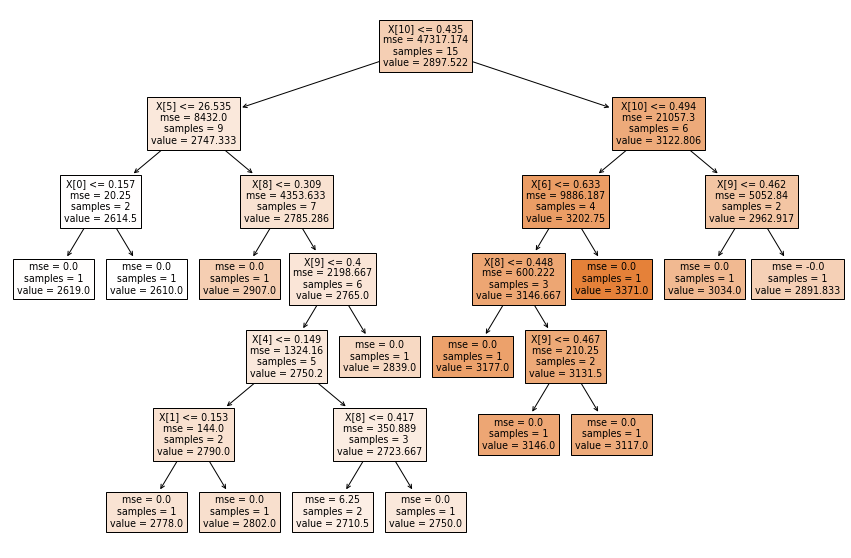

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dtree.fit(X_train, y_train), filled=True)
plt.show()

In [ ]:
tr1 = dtree.predict(X_train)
y1 = dtree.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr1))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr1,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr1))

RMSE via prediction on training set:  0.9128709291752769
Mean Absolute Error: [0.33333333]
R squared via prediction on training set:  0.9999823883535243


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y1))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y1,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y1))

RMSE via prediction on test set:  128.73538752029296
Mean Absolute Error: [115.6]
R squared via prediction on test set:  0.641181972494544


##Random Forest

In [ ]:
model_rf = RandomForestRegressor(n_estimators=5, max_depth=5, random_state=2)
model_rf.fit(X_train, y_train)
tr2 = model_rf.predict(X_train)
y2 = model_rf.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr2))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr2,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr2))

RMSE via prediction on training set:  92.17756618589445
Mean Absolute Error: [68.76888891]
R squared via prediction on training set:  0.82043086970316


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y2))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y2,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y2))

RMSE via prediction on test set:  75.38960287487329
Mean Absolute Error: [67.11333332]
R squared via prediction on test set:  0.8769444300232293


##Non-Linear Model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [ ]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 4
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min, degree_max+1):
    print('For degree ', degree)
    model = make_pipeline(
      PolynomialFeatures(degree, interaction_only=False), 
      LassoCV(
        eps=lasso_eps,
        n_alphas=lasso_nalpha,
        max_iter=lasso_iter, 
        normalize=True,cv=5
      )
    )
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    train_pred=np.array(model.predict(X_train))
    d = {'Yield': y_test, 'Predict': test_pred}
    temp_df = pd.DataFrame(data = d)
    temp_df = temp_df.sort_values('Yield')
    temp_df = temp_df.reset_index()

    # Print Figure
   
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test, y_test)
    MAE=mean_absolute_error(y_test,test_pred)
    print('RMSE = ', RMSE)
    print('MAE ', MAE)
    print('test_score = ', test_score)
    RMSE1=np.sqrt(np.sum(np.square(train_pred-y_train)))
    test_score1 = model.score(X_train, y_train)
    MAE1=mean_absolute_error(y_train,train_pred)
    print('RMSE = ', RMSE1)
    print('MAE ', MAE1)
    print('Train = ', test_score1)

For degree  2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.29810788237955, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 295.91203543423035, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 720.448152014731, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 936.9235541138814, tolerance: 39.32420254

RMSE =  349.91878252510895
MAE  131.8413578497425
test_score =  0.46979615839949374
RMSE =  700.0572417148139
MAE  151.7214466984253
Train =  0.3095105439978856
For degree  3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.3102110215259, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 389.2395915273737, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 559.6897269019901, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 259.60294587532735, tolerance: 39.32420254

RMSE =  358.7842065712946
MAE  135.69583523948023
test_score =  0.4425896920142663
RMSE =  702.8846952727049
MAE  152.78899371652332
Train =  0.303921659637184
For degree  4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.818108454870526, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 334.6623251232959, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 346.51182475229507, tolerance: 39.32420254625649

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 463.0240798756422, tolerance: 39.324202

RMSE =  351.0178044961869
MAE  132.77222831579738
test_score =  0.4664604086269647
RMSE =  702.304486326589
MAE  152.20542747937824
Train =  0.3050703663645097


##Support Vector Regression (SVR) 

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
regr=SVR(kernel='linear',C=20,epsilon=15,degree=4)
regr.fit(X_train,y_train)
tr4 = regr.predict(X_train)
y4 = regr.predict(X_test)
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

R squared via prediction on training set:  0.4454930811812958


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,tr4))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,tr4,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, tr4))

RMSE via prediction on training set:  161.98055478770505
Mean Absolute Error: [107.26762728]
R squared via prediction on training set:  0.4454930811812958


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,y4))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,y4,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, y4))

RMSE via prediction on test set:  84.09663966880032
Mean Absolute Error: [80.27442582]
R squared via prediction on test set:  0.8468786849260392


##Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [ ]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(90, activation='relu', input_shape=[X_train.shape[1],]))
ann.add(tf.keras.layers.Dense(60, activation='relu'))
ann.add(tf.keras.layers.Dense(30, activation='linear'))
ann.add(tf.keras.layers.Dense(10, activation='linear'))
ann.add(tf.keras.layers.Dense(1))

In [ ]:
ann.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                1080      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 8,691
Trainable params: 8,691
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.fit(X_train, y_train, epochs=10000,validation_data=(X_test,y_test))

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 37ms/step - loss: 23043.7285 - mean_squared_error: 23043.7285 - val_loss: 19104.2910 - val_mean_squared_error: 19104.2910
Epoch 7502/10000
1/1 [==============================] - 0s 32ms/step - loss: 23042.2500 - mean_squared_error: 23042.2500 - val_loss: 18993.6152 - val_mean_squared_error: 18993.6152
Epoch 7503/10000
1/1 [==============================] - 0s 58ms/step - loss: 23040.6895 - mean_squared_error: 23040.6895 - val_loss: 19086.1230 - val_mean_squared_error: 19086.1230
Epoch 7504/10000
1/1 [==============================] - 0s 65ms/step - loss: 23038.9434 - mean_squared_error: 23038.9434 - val_loss: 19108.4492 - val_mean_squared_error: 19108.4492
Epoch 7505/10000
1/1 [==============================] - 0s 33ms/step - loss: 23037.3652 - mean_squared_error: 23037.3652 - val_loss: 19018.9629 - val_mean_squared_error: 19018.9629
Epoch 7506/10000
1/1 [======================

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = ann.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = ann.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

102.8808168578699
230.22170633605865


In [ ]:
pred_train = np.reshape(pred_train, (pred_train.shape[0]))

In [ ]:
temp_df = y_train.to_frame()
temp_df['Pred_Yield'] = pred_train
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='ANN NDVI+EVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
temp_df = y_test.to_frame()
temp_df['Pred_Yield'] = pred
temp_df.sort_index(inplace=True)
fig = px.scatter(temp_df, x=temp_df.index, y="Yield", title='ANN NDVI+EVI',width=600,height=600)
fig.add_scatter(x=temp_df.index, y=temp_df['Pred_Yield'], mode='lines')
fig.show()

In [ ]:
real_y = np.append(y_train, y_test)
pred_y = np.append(tr1, y1)

# real_y = y_test
# pred_y = pred

temp_df = pd.DataFrame(real_y, columns=['Real Y'])
temp_df['Pred Y'] = pred_y
temp_df.sort_values('Real Y', inplace=True)
temp_df.reset_index(inplace=True)

fig = go.Figure()
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Real Y'], name='Yield'))
fig.add_trace(go.Line(x=temp_df.index, y=temp_df['Pred Y'], name='Predicted Yield'))
fig.update_xaxes(title_text='Index')
fig.update_yaxes(title_text='Yield')
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print('RMSE via prediction on training set: ', np.sqrt(mean_squared_error(y_train,pred_train))) 
print('Mean Absolute Error:',mean_absolute_error(y_train,pred_train,multioutput='raw_values'))
print('R squared via prediction on training set: ', r2_score(y_train, pred_train))

RMSE via prediction on training set:  102.8808168578699
Mean Absolute Error: [73.89397246]
R squared via prediction on training set:  0.776308226455339


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print('RMSE via prediction on test set: ', np.sqrt(mean_squared_error(y_test,pred))) 
print('Mean Absolute Error:',mean_absolute_error(y_test,pred,multioutput='raw_values'))
print('R squared via prediction on test set: ', r2_score(y_test, pred))

RMSE via prediction on test set:  230.22170633605865
Mean Absolute Error: [206.70639648]
R squared via prediction on test set:  -0.1475481100453464


# Comparisons

In [ ]:
import pandas as pd

In [219]:
df=pd.read_csv('https://raw.githubusercontent.com/frax0n/datasetsorstuff/main/Untitled%20spreadsheet%20-%20Sheet1.csv')

In [220]:
df

,Input,Regression Type,RMSE(training),MAE(training),R2(training),RMSE(test),MAE(test),R2(test)
0,NDVI,Decision Tree,0.00,0.00,1.00,269.08,221.40,-0.560
1,NDVI,Random Forest,65.35,45.84,0.90,150.50,100.53,0.500
2,NDVI,Non-Linear,702.30,152.20,0.30,35.63,135.95,0.460
3,NDVI,Support Vector,162.42,107.56,0.44,84.61,81.49,0.840
4,NDVI,ANN,162.74,105.83,0.44,80.49,77.58,0.850
5,EVI,Decision Tree,0.00,0.00,1.00,269.08,221.40,-0.056
6,EVI,Random Forest,104.24,72.20,0.77,175.81,121.00,0.330
7,EVI,Non-Linear,704.00,152.83,0.30,363.80,139.14,0.420
8,EVI,Support Vector,162.47,107.69,0.44,84.38,81.22,0.840
9,EVI,ANN,162.97,106.57,0.43,79.07,76.44,0.860


In [ ]:
df.columns

Index(['Input', 'Regression Type', 'RMSE(training)', 'MAE(training)',
       'R2(training)', 'RMSE(test)', 'MAE(test)', 'R2(test)'],
      dtype='object')

In [ ]:
pd.unique(df['Input'])

array(['NDVI', 'EVI', 'LAI', 'NDVI&EVI', 'EVI&LAI', 'LAI&NDVI',
       'NDVI&EVI&LAI'], dtype=object)

In [ ]:
pd.unique(df['Regression Type'])

array(['Decision Tree', 'Random Forest', 'Non-Linear', 'Support Vector',
       'ANN'], dtype=object)

In [ ]:
df2 = df.copy()

In [ ]:
df2.drop(columns='Input', inplace=True)

In [ ]:
import plotly.express as px

fig = px.bar(df.loc[df['Regression Type'] == ''], x='Regression Type', y='RMSE(training)', color='Regression Type')
fig.show()

In [ ]:
for i in ['RMSE(training)', 'MAE(training)', 'R2(training)', 'RMSE(test)', 'MAE(test)', 'R2(test)']: 
  fig = px.box(df, x='Input', y = i)
  fig.show()

R2 Score

In [ ]:
for i in ['Decision Tree', 'Random Forest', 'Non-Linear', 'Support Vector', 'ANN']:
  for j in ['R2(training)', 'R2(test)']:
    fig = px.bar(df.loc[df['Regression Type'] == i], x = 'Input', y = j, color = 'Input',width=750,range_y=(0,1))
    
    fig.update_xaxes(title=i)    
    fig.show()

RMSE Value

In [ ]:
for i in ['Decision Tree', 'Random Forest', 'Non-Linear', 'Support Vector', 'ANN']:
  for j in ['RMSE(training)', 'RMSE(test)']:
    fig = px.bar(df.loc[df['Regression Type'] == i], x = 'Input', y = j, color = 'Input',width=750,range_y=(0,1000))
    fig.update_xaxes(title=i)
    fig.show()

MAE Value

In [ ]:
for i in ['Decision Tree', 'Random Forest', 'Non-Linear', 'Support Vector', 'ANN']:
  for j in ['MAE(training)', 'MAE(test)']:
    fig = px.bar(df.loc[df['Regression Type'] == i], x = 'Input', y = j, color='Input',width=750,range_y=(0,250))
    fig.update_xaxes(title=i)
    fig.show()

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sudislife/DatasetsForColab/main/DATAFRAME_NDVIEVI_-_DATAFRAME_NDVIEVI.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/frax0n/datasetsorstuff/main/yeet.csv')
df=df.set_index('year')
df2=df2.set_index('Year')
df

,Unnamed: 0,nOct,nNov,nDec,nJan,nFeb,nMar,nApr,nMay,nMean,eOct,eNov,eDec,eJan,eFeb,eMar,eApr,eMay,eMean,Area,Production,Yield,LAI,Rainfall
year,,,,,,,,,,,,,,,,,,,,,,,,
2000,0,0.253092,0.205477,0.214600,0.231618,0.225767,0.201072,0.166901,0.146278,0.205601,0.168545,0.132783,0.138434,0.150869,0.151159,0.137191,0.114986,0.102854,0.137103,27.490000,76.370000,2778.000000,0.291067,37.809430
2001,1,0.252050,0.220225,0.227810,0.250651,0.248579,0.230734,0.169408,0.146951,0.218301,0.165846,0.140879,0.145381,0.163560,0.167072,0.158622,0.118505,0.103027,0.145362,25.730000,69.680000,2708.000000,0.291067,45.907669
2002,2,0.200088,0.178285,0.187111,0.206101,0.207492,0.194706,0.161110,0.138828,0.184215,0.134577,0.115123,0.120288,0.131459,0.139568,0.134199,0.111805,0.097714,0.123092,26.340000,72.770000,2762.000000,0.291067,20.676182
2003,3,0.299165,0.242215,0.252126,0.266660,0.261027,0.227542,0.168698,0.159793,0.234653,0.197742,0.158818,0.163915,0.173033,0.172934,0.154694,0.117378,0.110974,0.156186,25.200000,65.760000,2610.000000,0.370912,48.679591
2004,4,0.267995,0.233797,0.252087,0.263573,0.252415,0.225391,0.164787,0.154184,0.226779,0.172131,0.148147,0.161418,0.171633,0.167870,0.151652,0.112510,0.107000,0.149045,26.590000,72.160000,2713.000000,0.407855,41.511458
2005,5,0.296144,0.238595,0.244888,0.255162,0.245133,0.210755,0.164522,0.147785,0.225373,0.196240,0.154162,0.158483,0.168876,0.165706,0.141588,0.112439,0.102569,0.150008,26.380000,68.640000,2602.000000,0.425636,43.397656
2006,6,0.270448,0.241070,0.257106,0.272435,0.267724,0.234963,0.185652,0.162515,0.236489,0.178645,0.154649,0.165961,0.180417,0.175352,0.154543,0.126178,0.113756,0.156188,26.480000,69.350000,2619.000000,0.406170,50.427344
2007,7,0.288058,0.232087,0.246437,0.260172,0.252693,0.227080,0.173423,0.158299,0.229781,0.192510,0.150545,0.158859,0.170309,0.171186,0.154262,0.118173,0.109261,0.153138,27.990000,75.810000,2708.000000,0.424946,40.602344
2008,8,0.269548,0.241286,0.261694,0.272596,0.252552,0.215985,0.166817,0.151305,0.228973,0.175850,0.153952,0.166665,0.176006,0.167223,0.146345,0.112948,0.103940,0.150366,28.040000,78.570000,2802.000000,0.423478,44.523698


In [ ]:
df.columns

Index(['Unnamed: 0', 'nOct', 'nNov', 'nDec', 'nJan', 'nFeb', 'nMar', 'nApr',
       'nMay', 'nMean', 'eOct', 'eNov', 'eDec', 'eJan', 'eFeb', 'eMar', 'eApr',
       'eMay', 'eMean', 'Area', 'Production', 'Yield', 'LAI', 'Rainfall'],
      dtype='object')

In [ ]:
ndvi_df = df[['nOct', 'nNov', 'nDec', 'nJan', 'nFeb', 'nMar', 'nApr', 'nMay']]
evi_df = df[['eOct', 'eNov', 'eDec', 'eJan', 'eFeb', 'eMar', 'eApr', 'eMay']]

In [ ]:
ndvi_df.columns

Index(['nOct', 'nNov', 'nDec', 'nJan', 'nFeb', 'nMar', 'nApr', 'nMay'], dtype='object')

In [ ]:
ndvi_arr = ndvi_df.to_numpy()
ndvi_arr = ndvi_arr.transpose()

In [ ]:
evi_arr = evi_df.to_numpy()
evi_arr = evi_arr.transpose()

In [ ]:
ndvi_df = pd.DataFrame(ndvi_arr, columns=ndvi_df.index, index=ndvi_df.columns)
evi_df = pd.DataFrame(evi_arr, columns=evi_df.index, index=evi_df.columns)

In [ ]:
ndvi_df.head()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
nOct,0.253092,0.252050,0.200088,0.299165,0.267995,0.296144,0.270448,0.288058,0.269548,0.241485,0.347760,0.358902,0.367665,0.362341,0.328845,0.306281,0.340430,0.295351,0.331234,0.384006
nNov,0.205477,0.220225,0.178285,0.242215,0.233797,0.238595,0.241070,0.232087,0.241286,0.217261,0.281049,0.285063,0.272726,0.294062,0.269318,0.261867,0.278652,0.258309,0.262935,0.304001
nDec,0.214600,0.227810,0.187111,0.252126,0.252087,0.244888,0.257106,0.246437,0.261694,0.240780,0.289971,0.291292,0.281012,0.307282,0.282557,0.279289,0.301451,0.286336,0.282243,0.321684
nJan,0.231618,0.250651,0.206101,0.266660,0.263573,0.255162,0.272435,0.260172,0.272596,0.258629,0.311160,0.301731,0.296440,0.325629,0.309647,0.302397,0.333207,0.308514,0.302006,0.347627
nFeb,0.225767,0.248579,0.207492,0.261027,0.252415,0.245133,0.267724,0.252693,0.252552,0.241380,0.321875,0.290200,0.308570,0.333382,0.306330,0.302205,0.319128,0.295089,0.306453,0.348020


In [ ]:
evi_df.head()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
eOct,0.168545,0.165846,0.134577,0.197742,0.172131,0.196240,0.178645,0.192510,0.175850,0.160011,0.234518,0.238074,0.247463,0.230249,0.216926,0.201991,0.219440,0.193263,0.215998,0.241451
eNov,0.132783,0.140879,0.115123,0.158818,0.148147,0.154162,0.154649,0.150545,0.153952,0.136783,0.178119,0.186098,0.175555,0.183803,0.172717,0.166468,0.174134,0.163753,0.163818,0.183681
eDec,0.138434,0.145381,0.120288,0.163915,0.161418,0.158483,0.165961,0.158859,0.166665,0.153861,0.174738,0.188087,0.178690,0.193481,0.181299,0.178365,0.187941,0.178359,0.177962,0.191645
eJan,0.150869,0.163560,0.131459,0.173033,0.171633,0.168876,0.180417,0.170309,0.176006,0.166153,0.193227,0.197717,0.193958,0.206723,0.198640,0.198084,0.212891,0.198721,0.195163,0.218316
eFeb,0.151159,0.167072,0.139568,0.172934,0.167870,0.165706,0.175352,0.171186,0.167223,0.156618,0.210833,0.193210,0.208757,0.220139,0.200874,0.196751,0.207387,0.195729,0.207443,0.229262


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
for i in ndvi_df.columns:
  fig.add_trace(go.Box(y=ndvi_df[i], name=i))

fig.show()

In [ ]:
fig = go.Figure()
for i in evi_df.columns:
  fig.add_trace(go.Box(y=evi_df[i], name=i))

fig.show()